Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/03_Classification'
except ImportError as e:
    pass

# Some Classifiers, Overfitting, and Evaluation Metrics

<div style="text-align: center;">
    <img src="imgs/classification_meme.png" style="width: 60%;">
</div>

In this exercise, for the Python examples, we will use a dataset about **GOLF** which you can find in **data/golf.csv**.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

# load the data
golf = pd.read_csv('data/golf.csv')

golf.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


In [2]:
# create a copy of the data
golf_preprocessed = golf.copy()

# create a variable with the values of the target variable
golf_target = golf['Play']

# and remove it from the dataframe so it only contains the features that our model should use
golf_preprocessed = golf.drop(columns='Play')

# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
golf_target = label_encoder.fit_transform(golf_target)

# encode the Outlook and Wind features
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(
    encoder.fit_transform(golf_preprocessed[['Outlook', 'Wind']]).toarray(), 
    columns=encoder.get_feature_names_out(['Outlook', 'Wind'])
)

golf_preprocessed = golf_preprocessed.drop(columns=['Outlook', 'Wind'])
golf_preprocessed = golf_preprocessed.join(encoded)
golf_preprocessed.head()

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,0.0,0.0,1.0,0.0,1.0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,0.0,1.0,0.0,1.0,0.0


To properly evaluate our model's performance on unseen data, we need a **separate test set**. We can either use a **train-test split** or a completely separate test set, which you can find in **data/golf_testset.csv**.

In [6]:
golf_test = pd.read_csv('data/golf_testset.csv')

# create a variable with the values of the target variable
golf_target_test = golf_test['Play']

# and remove it from the dataframe so it only contains the features that our model should use
golf_test = golf_test.drop(columns='Play')

# encode the target variable into a numeric value
golf_target_test = label_encoder.transform(golf_target_test)

encoded = pd.DataFrame(
    encoder.transform(golf_test[['Outlook', 'Wind']]).toarray(), 
    columns=encoder.get_feature_names_out(['Outlook', 'Wind'])
)
golf_test = golf_test.drop(columns=['Outlook', 'Wind'])

golf_test = golf_test.join(encoded)
golf_test.head()

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,1.0,0.0,0.0,0.0,1.0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,0.0,1.0,0.0,0.0,1.0


# Nearest Centroid Classifier (NCC): Classification as Simple as It Gets

a.k.a. _Rocchio classifier_

## What is Nearest Centroid?
Nearest Centroid is a simple and intuitive machine learning algorithm used for classification. Given a data point, it simply assigns it the label (class) of the training sample whose mean or centroid is closest to it. 

## How Does Nearest Centroid Work?
1. Compute the centroid for each class (i.e., the point that lies in the middle of all data points in a class).

<div style="text-align: center;">
    <img src="imgs/nearest_centroid_learning.png" style="width: 75%;">
</div>

2. Calculate the distance (e.g., Euclidean distance) from a new data point to all centroids.

<div style="text-align: center;">
    <img src="imgs/nearest_centroid_predict.png" style="width: 75%;">
</div>

3. Assign the class label of the nearest centroid to the new data point.

## Nearest Centroid for Golf Dataset

In [ ]:
# Train a Nearest Centroid classifier
from sklearn.neighbors import NearestCentroid 
ncc = NearestCentroid()
ncc.fit(golf_preprocessed, golf_target)

NearestCentroid()

In [8]:
## apply the model (predict)
golf_test_prediction = ncc.predict(golf_test)

# add the prediction and gold standard (target) to the dataframe
golf_comparison = golf_test.assign(Play=golf_target_test)
golf_comparison = golf_comparison.assign(predictionPlay=golf_test_prediction)

golf_comparison

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True,Play,predictionPlay
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0,1,0
1,80.0,90.0,1.0,0.0,0.0,0.0,1.0,0,0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0,1,1
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0,1,0
4,68.0,80.0,0.0,1.0,0.0,0.0,1.0,1,1
5,65.0,70.0,0.0,1.0,0.0,0.0,1.0,0,1
6,64.0,65.0,1.0,0.0,0.0,0.0,1.0,1,1
7,72.0,95.0,0.0,0.0,1.0,1.0,0.0,0,0
8,69.0,70.0,0.0,0.0,1.0,1.0,0.0,1,1
9,75.0,80.0,0.0,0.0,1.0,1.0,0.0,0,1


## $k$-NN vs. Nearest Centroid: Isn't it all the same?

- **Standard problem** (e.g., separable ellipsses): both approaches work reasonably well

<div style="text-align: center;">
    <img src="imgs/knn_vs_ncc_standard.png" style="width: 75%;">
</div>


- **Label noise** (e.g., some data points are wrongly labelled): $k$-NN losses performance, but NCC stays stable

<div style="text-align: center;">
    <img src="imgs/knn_vs_ncc_label_noise.png" style="width: 75%;">
</div>


- **Unbalanced data**: $k$-NN may lose performance (towards the class boundary), but NCC stays strong
<div style="text-align: center;">
    <img src="imgs/knn_vs_ncc_imbalance.png" style="width: 75%;">
</div>


- **Outliers**: $k$-NN is unaffected, NCC loses performance (i.e., outliers can move centroids significantly) 
<div style="text-align: center;">
    <img src="imgs/knn_vs_ncc_outliers.png" style="width: 75%;">
</div>


- **Multiple clusters**: $k$-NN is unaffected, NCC fails
<div style="text-align: center;">
    <img src="imgs/knn_vs_ncc_multiple_clusters.png" style="width: 75%;">
</div>



| Problem | k-NN | Nearest Centroid |
|---|---|---|
| Robustness | robust to outliers   | robust to label noise & class imbalance |
| Classification time | slow (linear in number of data points) | fast (linear in number of classes) |
| Memory requirements | High (store all data points) | Low (story only the centroids) |

Which classifier is better **depends on the problem at hand**!

# Decision Tree Classifier

## What is a Decision Tree?
A Decision Tree (DT) is a supervised machine learning algorithms used for classification and regression. It predicts the value of the target variable by learning simple decision rules inferred from the data features.


## How does a Deicison Tree Classifier work?


1. Start at the **root node**, which represents the entire dataset.
2. Choose the attribute that best splits the data into subsets.
    - We determine the best split by measuring the node impurity of the split (i.e., how well it divides the data). We can use measures like Gini Index, Information Gain etc 
    
3. Use the chosen attribute to create branches that split the dataset into different groups based on the feature values.
    - Specifying the attribute test condition depends on the _attribute types_ and _number of ways to split_
    - **Important**: test all possible splits!

<div style="display: flex; justify-content: space-between; align-items: center;">
    <img src="imgs/decision_tree1.png" style="width: 40%;">
    <img src="imgs/decision_tree2.png" style="width: 50%;">
</div>


4. Repeat for Each Branch
    - For each branch (subset of the data), the process is repeated: the algorithm chooses the best feature to split on, based on how well it separates the data in that subset.
   - Continue this recursive splitting until certain stopping conditions are met 
       - Maximum Depth: The tree reaches a predefined maximum depth.
       - Pure Nodes: All samples in a node belong to the same class (i.e., the node is "pure").
       - Insufficient Data: There are not enough data points to further split. 
       - Low Information Gain: Further splits do not lead to significant improvement in the decision-making process.

5. Assign a Class Label to Each Leaf Node
    - Once the tree is built, each **leaf node** (a terminal node with no further splits) is assigned a class label based on the majority class of the data points in that leaf.

6. Make Predictions
    - For a new input data point, the decision tree traverses the tree starting from the root, moving along the branches based on the values of the features of the input data. It follows the splits until it reaches a leaf node, and the class label of that leaf node is the predicted class for the input data.

<div style="text-align: center;">
    <img src="imgs/decision_tree3.png" style="width: 75%;">
</div>


## How to Choose Attribute Test Conditions?

### Based on the _Number of Ways to Split_
- **Binary split**  
- **Multi-way split**  

### Based on the _Attribute Types_

1. **Nominal Values**  
    - **Binary split**: Divide values into 2 subsets.

        <div style="text-align: center;">
            <img src="imgs/nominal_feat_binary_split.png" style="width: 75%;">
        </div>

    - **Multi-way split**: Use as many partitions as distinct values.

        <div style="text-align: center;">
            <img src="imgs/nominal_feat_multiway_split.png" style="width: 40%;">
        </div>

2. **Ordinal Values**  
    - **Binary split**: Divide values into 2 subsets **while keeping the order**.

        <div style="text-align: center;">
            <img src="imgs/ordinal_feat_binary_split.png" style="width: 75%;">
        </div>

    - **Multi-way split**: Use as many partitions as distinct values.

        <div style="text-align: center;">
            <img src="imgs/ordinal_feat_multiway_split.png" style="width: 40%;">
        </div>

3. **Continuous Values**  
    - **Binary split**: (A < v) or (A ≥ v).

        <div style="text-align: center;">
            <img src="imgs/cont_feat_binary_split.png" style="width: 30%;">
        </div>

    - **Multi-way split**: Discretize to form an ordinal attribute (e.g., using binning).

        <div style="text-align: center;">
            <img src="imgs/cont_feat_multiway_split.png" style="width: 30%;">
        </div>

## How to Determine the Best Split?

We use a measure of **node impurity**: in this lecture, we use the **GINI Index**.

### GINI Index

The GINI Index measures how often a randomly chosen element would be incorrectly classified.

$ GINI (t) = 1 - \sum_j [p(j|t)]^2 $

where $ p(j|t) $ is the relative frequency of class $ j $ at node $ t $.

- **Minimum (0):** All records belong to one class → most informative.
- **Maximum** $ (1 - \frac{1}{n_c}) $: All records are equally distributed among all classes → least informative.

<div style="text-align: center;">
    <img src="imgs/gini_index.png" style="width: 50%;">
</div>

### Splitting Based on GINI

For a node $ p $ split into $ k $ partitions (children), we compute the quality of the split as:

$ GINI_{split} = \sum_{i=1}^k \frac{n_i}{n} GINI(i) $

where $ n_i $ = number of records at child node $ i $ and $ n $ = number of records at node $ p $.

**Intuition:** Weight the GINI index of each partition according to the size of the partition.

### Computing the GINI Split

Split into two partitions and compute the **purity gain** to decide the best split (i.e., highest purity gain = lowest $ GINI_{split} $).

$ \text{Purity Gain} = \text{Impurity before splitting} - \text{Impurity after splitting} $

## Let's build a decision tree (step-by-step)

A hospital would like to support the doctors with their diagnoses. For this purpose, health data from
various patients were collected (see table below). Build a decision tree using the GINI index in order
to be able to automatically classify a patient’s state of health. List all calculations in your solution and
draw the resulting decision tree!


| # | Heart Rate | Blood Pressure | Class   |
| - | ---------- | -------------- | ------- |
| 1 | irregular  | normal         | ill     |
| 2 | regular    | normal         | healthy |
| 3 | irregular  | abnormal       | ill     |
| 4 | irregular  | abnormal       | ill     |
| 5 | regular    | abnormal       | healthy |
| 6 | regular    | abnormal       | ill     |
| 7 | regular    | normal         | healthy |
| 8 | regular    | normal         | healthy |

GINI(Hearth Rate = irregular) = 1 - (3/3)^2 = 0
GINI(Hearth Rate = regular) = 1- (4/5)^2 - (1/5)^2 = 0.32
GINI(Hearth Rate) = 3/8 * 0 + 5/8 * 0.32 = 0.2

## Decision Tree for the Golf Dataset

The decision tree classification is implemented in the [```DecisionTreeClassifier``` class](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) in scikit-learn.

Parameters:
- ```criterion```: ```'gini'``` (default) or ```'entropy'```
- ```max_depth```: maximum depth of the tree (default: unbounded)
- ```min_samples_leaf```: minimum number of examples in each leaf node (default 2)
- and many more ...


In [9]:
# Train a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(golf_preprocessed, golf_target)

DecisionTreeClassifier()

### Visualising the tree

As the decision tree classifier learns a model (other than the KNN classifier, which just stores all training data), we might be interested in looking at this model.

You can explore the learned tree by using the [.tree](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html) member.

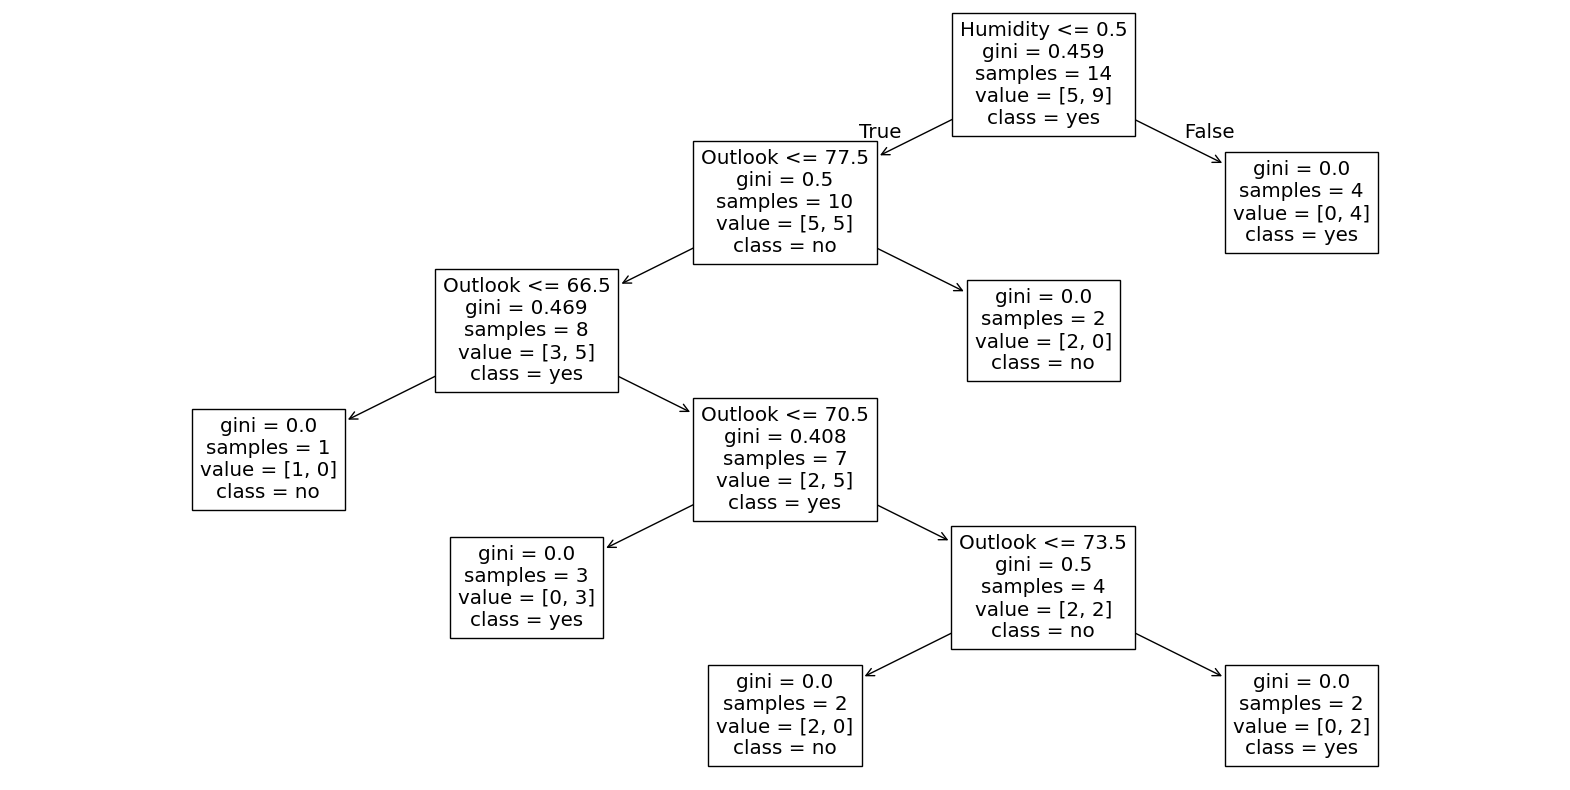

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt,
               feature_names=golf.columns, 
               class_names=label_encoder.classes_)
plt.show()

## Strengths of Decision Trees:
- **Simplicity and Interpretability:** Decision trees are straightforward and easy to understand. You can visualize them (at least small-sized trees) like a flowchart, making it simple to see how decisions are made.
- Works with **both numerical and categorical data**.
- **Inexpensive** to construct and **fast** at classifying unknown records.
- Requires **little data preparation**: no need to scale or normalize the features.
- **Versatility**: They work for both classification and regression.

## Limitations:
- **Overfitting:** It can create over-complex trees that don't generalize well to new data; this can be mitigated with pruning and maximum depth constraints.
- Decisions are based on **a single attribute at a time**.
- Can only represent **decision boundaries parallel to the axes**.
- **Biased towards dominant classes or features with many categories**.
- **Instability:** The model can be unreliable, as slight variations in input can lead to significant differences in predictions.

## ✅ Good Practice:
✔ **Balance your dataset** before fitting the decision tree.

✔ **Prevent overfitting** by using pruning, setting the minimum number of samples required at a leaf node, or setting the maximum depth of the tree.

# Random Forest

<div style="text-align: center;">
    <img src="imgs/random_forest_meme.jpg" style="width: 30%;">
</div>

## What is a Random Forest?
A random forest is an ensemble model or meta-estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control overfitting.

<div style="text-align: center;">
    <img src="imgs/random_forest.png" style="width: 70%;">
</div>

### Random Forest in Python
Common parameters to optimize:
- **n_estimators** (The number of trees in the forest)
- **criterion** {“gini”, “entropy”}
- **max_depth**
- **min_samples_split**
- **min_samples_leaf**

### Random Forest for the Golf Dataset

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0)

random_forest.fit(golf_preprocessed, golf_target)

RandomForestClassifier(max_depth=2, random_state=0)

# Overfitting

<div style="text-align: center;">
    <img src="imgs/overfitting_meme.png" style="width: 40%;">
</div>

## What is Overfitting?
The classifier has good accuracy on training data but performs poorly on test data because it fits too closely to the training data and fails to generalize to unseen examples.

<div style="text-align: center;">
    <img src="imgs/overfitting.png" style="width: 60%;">
</div>

### Signs of Overfitting
- The model works well on the training set but performs poorly on the test set.
- A decision tree that is too deep.
- A decision tree with too many branches.

### Causes of Overfitting
- Noise/outliers in the training data.
- Too little training data.
- High model complexity.

## ⚠️ **An overfitted model does not generalize well to unseen data!**

# Evaluation Metrics

## Why Can't We Use the Training Data to Measure How Well the Model Works?

- We can measure a **training error**, which tells us how well the model represents the training dataset.
- However, this does not tell us anything about the error on other data points!
- Imagine we create a **1-NN classifier** – what would be the training error?  
  → **Zero**, because each point is its own nearest neighbor! But this does not mean the model generalizes well.

### For a correct measurement, we need a second dataset:
- We can either **collect more data** to create a **test dataset**.
- Or we **split the dataset** before training into two parts.

We then evaluate the performance of our classification model by applying it to the **test dataset** (a *different* dataset) and measuring the error.

## Train-Test Splitting

Before training a model, we need to **split** our dataset into:
- **Training Set** → Used to train the model.
- **Test Set** → Used to evaluate model performance on unseen data.

This prevents **overfitting**, where a model performs well on known data but fails on new data.

## Confusion Matrix
It evaluates the predictive capability of a model in terms of the correctly/incorrectly classified instances.

<div style="text-align: center;">
    <img src="imgs/confusion_matrix.png" style="width: 80%;">
</div>

### Confusion Matrix in Python

#### Visualising the confusion matrix

The following [sample code](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) visualises the confusion matrix for easier interpretation:

In [15]:
## A helper function to plot the confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

Confusion Matrix:
[[2 3]
 [2 7]]


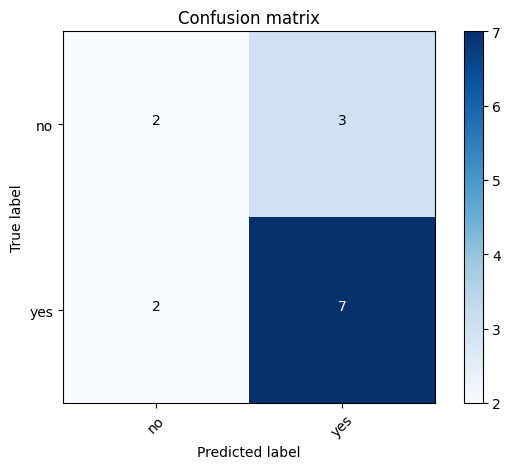

In [16]:
from sklearn.metrics import confusion_matrix

# Use the trained Decision Tree to predict the labels of the test set
golf_prediction = dt.predict(golf_test)

# Print the true target labels and the model's predictions
display(golf_target_test)
display(golf_prediction)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(golf_target_test, golf_prediction))

# Plot the confusion matrix
cnf_matrix = confusion_matrix(golf_target_test, golf_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)

## 1️⃣ Accuracy

A single measure that tells you the overall accuracy of the result
    $$Accuracy=\frac{TP+TN}{TP+TN+FP+FN} = \frac{\text{Correct predictions}}{\text{All predictions}}$$

In [ ]:
from sklearn.metrics import accuracy_score

display(golf_target_test)
display(golf_prediction)
accuracy = accuracy_score(golf_target_test, golf_test_prediction)

# Please limit your results to a resonable decimal number 
print(f"Accuracy: {accuracy*100} %")
print(f"Accuracy: {accuracy*100:.2f} %")

# NB: Train better than naive baseline (majority class)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

Accuracy: 57.14285714285714 %
Accuracy: 57.14 %


### What is a good accuracy?
✅ Depends on your problem!

Baseline: naive guessing (e.g., always predict the majority class)


### ⚠️ Limitations: Unbalanced data

- If 99% belong to class “no disease”, and 1% to class "disease"
- The classifier always says “no disease” – 99% Accuracy

<div style="text-align: center;">
    <img src="imgs/accuracy_meme.jpeg" style="width: 40%;">
</div>

**Accuracy is misleading** because the model does not detect any positive examples!

##  2️⃣ Precision, Recall, F1-score

Measure two aspects of the result for every class

### Precision: How many examples that  are classified  positive are actually positive?


$Precision = \frac{TP}{TP+\textbf{FP}}$

### Recall: Which fraction of all  positive examples is  classified correctly? 

$Recall = \frac{TP}{TP+\textbf{FN}}$

### F1 score: considers both precision and recall (harmonic mean) 

$F1 = \frac{2 * precicion * recall}{precision + recall}$

<div style="text-align: center;">
    <img src="imgs/precision_recall_matrix.png" style="width: 80%;">
</div>

### An example with 2 classes
<div style="text-align: center;">
    <img src="imgs/confusion_matrix_example.png" style="width: 80%;">
</div>

So far, the **$F_1$-measure** is only defined for individual classes and is not yet useful for getting an overview of the overall performance of a classifier. To address this, one commonly takes the average over all classes using one of the following two approaches:

- **Micro Average $F_1$-Measure:**  
  The values of **True Positives (TP), False Positives (FP),** and **False Negatives (FN)** are summed up across all classes. Then, **precision, recall,** and **$F_1$-measure** are computed using these totals.

- **Macro Average $F_1$-Measure:**  
  **Precision and recall** are computed separately for each class. Then, the **average precision** and **average recall** are used to calculate the final **$F_1$-measure**.

These averaging methods help evaluate the overall classifier performance, especially when dealing with **imbalanced datasets**, where some classes may have significantly more instances than others.

In [19]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(golf_target_test, golf_prediction, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

          no       0.50      0.40      0.44         5
         yes       0.70      0.78      0.74         9

    accuracy                           0.64        14
   macro avg       0.60      0.59      0.59        14
weighted avg       0.63      0.64      0.63        14



## 3️⃣ ROC Curves & AUC

To evaluate and compare different classifiers, it can be useful to look at **ROC Curves**.

### Receiver Operating Characteristics (ROC) Curves
- A graphical way to evaluate how well a classification model performs, especially when distinguishing between two classes.
- When your model makes a prediction, it assigns **probabilities** to each class (i.e., how certain the classifier is about its prediction).
- ROC Curves visualize the **true positive rate (TPR)** against the **false positive rate (FPR)** in relation to the model's confidence.
  
    - **True Positive Rate (TPR) = Recall = Sensitivity**: Measures how well the model identifies actual positives.

      $ TPR = \frac{TP}{TP + FN} $

    - **False Positive Rate (FPR)**: Measures how well the model identifies actual negatives.

      $ FPR = \frac{FP}{FP + TN} $

### How to Create ROC Curves?
1. Sort classifications according to their confidence scores.
2. Evaluate:
    - **Correct prediction** → Move one step up.
    - **Incorrect prediction** → Move one step to the right.

### How to Interpret ROC Curves?

✅ **The steeper, the better**
- Random guessing results in a diagonal line ($TPR = FPR$).
- A good classifier should result in a curve **significantly above the diagonal**.
- **Best possible results**: All correct predictions have higher confidence than all incorrect ones.

<div style="text-align: center;">
    <img src="imgs/roc_curves_auc.png" style="width: 80%;">
</div>

### AUC: Area Under the Curve
- A single number that summarizes the performance of a classifier by telling us **how well the model distinguishes between two classes**.
    - You can think of it as the **probability that a randomly chosen positive example is ranked higher than a randomly chosen negative example** by the model.

- **Hint**: It's the area under the ROC Curve.
- **Interpretation**: AUC scores range between **0.0 and 1.0**:
    - **$AUC = 1.0$** → Perfect classifier (always correct).
    - **$AUC = 0.5$** → Random guessing (useless model).
    - **$AUC < 0.5$** → Worse than random (model classifies incorrectly more often than correctly).

### ROC Curves in Python

You can create these curves using the [`roc_curve()` function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).  
Since ROC Curves depend on the confidence scores of each prediction made by the classifier, you need to call the `predict_proba()` function instead of `predict()`.  

- **`predict_proba()`** returns the confidence values for each class.
- **`predict()`** returns the actual class prediction.

This ensures that the model's probability estimates are used to plot the curve rather than just the final classifications.

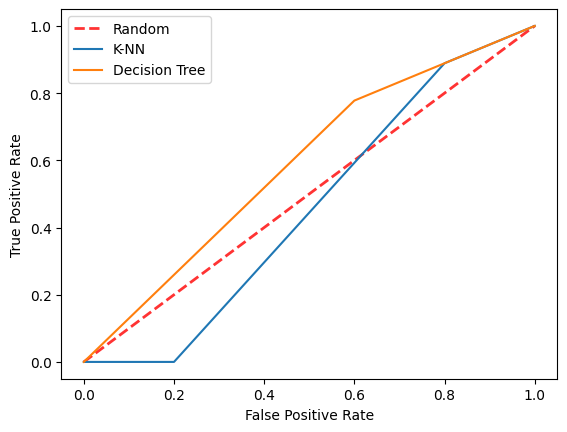

In [20]:
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier

# create a kNN classifier
knn_estimator = KNeighborsClassifier(3)

# fit kNN to the training data
knn_estimator.fit(golf_preprocessed, golf_target)

# get the class probabilities (confidences) for the test set for kNN
proba_for_each_class_knn = knn_estimator.predict_proba(golf_test)

# get the class probabilities (confidences) for the test set for DT
proba_for_each_class_dt = dt.predict_proba(golf_test)

# calculate the ROC Curve for the kNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(golf_target_test, proba_for_each_class_knn[:,1], pos_label=1)

# calculate the ROC Curve for the DT
fpr_dt, tpr_dt, thresholds_dt = roc_curve(golf_target_test, proba_for_each_class_dt[:,1], pos_label=1)

# plot the line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# plot the ROC Curve for the classifiers
plt.plot(fpr_knn,tpr_knn,label='K-NN')
plt.plot(fpr_dt,tpr_dt,label='Decision Tree')


# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show() 

## Let's compute evaluation metrics for a multi-class classification problem (step-by-step)

Given a data set $D = {o_1, . . . , o_n}$ with known class labels $C(o_i) ∈ C = \{A, B, C\}$ of the objects, we use a classifier $K$ to predict the class $K(o_i)$ of each object $o_i \in D$. The table below gives shows the actual and the preedicted labels:

| $i$ | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| $C(o_i)$ | A | B | A | C | C | B | A | A | A | B | B | C | C | C | B |
| $K(o_i)$ | A | A | C | C | B | B | A | A | A | C | A | A | C | C | B |


<sub>Source: https://www.dbs.ifi.lmu.de/Lehre/KDD/WS1819/tutorials/solution_10.pdf</sub>

#### 1. Setup the confusion matrix
Predicted 
| |A|B|C| |
|-|-|-|-|-|
|A|4|0|1|5|
|B|2|2|1|5|
|C|1|1|3|5|
| |7|3|5|15|

Actual (Vertical)

#### 2. Compute the accuracy / classification error 

Accuracy = 4+2+3 /15 = 9/15 = 60%
Error = 1 - Accuracy = 40%

#### 3. Compute the precision and recall for each class $i \in C$

Precision(A) = 4/7
Precision(B) = 2/3
Precision(C) = 3/5

Recall(A) = 4/5
Recall(B) = 2/5
Recall(C) = 3/5

#### 4. Compute the $F_1$-measure for all classes

F1(A) = 2*(4/5)*(4/7) / 4/5+4/7

#### 5. Compute the Micro- and Macro-Average $F_1$-measures for the example above. What do you observe?

False Positive(A) = 2+1 = 3
False Negative(A) = 0+1 = 1

# QUIZ TIME

## Question 1:  
Consider a scenario where a dataset contains two classes that are **not linearly separable** but have clear clusters. Would a nearest centroid classifier work well? Why or why not?  a **non-linear** boundary that separates the clusters correctly.

## Question 2:

A decision tree has grown very deep and performs perfectly on the training set. However, it performs poorly on unseen test data. **What two main techniques can be applied to improve generalization, and how do they work?**

## Question 3:

You are given a dataset with **only 20 training samples but 500 features**. What issue do you expect when training a decision tree, and how can you address it?

## Question 4:

A model has **high precision but low recall**. In what kind of real-world application might this tradeoff be acceptable? Conversely, when would **high recall but low precision** be preferable?

## Question / Task 5  

Using the **Iris dataset**, train:  
(i) a **Decision Tree classifier**  
(ii) a **Random Forest classifier**  

1. **Plot the decision tree.**  
2. **Evaluate the accuracy** of both models and **draw a confusion matrix** for each.  